In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv',header=None)

In [3]:
#Give the column names
columns_name = ['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','target']
df.columns = columns_name

In [4]:
df.shape

(1728, 7)

In [5]:
df.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.tail()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [7]:
df.columns

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'target'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature 1  1728 non-null   object
 1   feature 2  1728 non-null   object
 2   feature 3  1728 non-null   object
 3   feature 4  1728 non-null   object
 4   feature 5  1728 non-null   object
 5   feature 6  1728 non-null   object
 6   target     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.isnull().sum()

feature 1    0
feature 2    0
feature 3    0
feature 4    0
feature 5    0
feature 6    0
target       0
dtype: int64

In [10]:
df[df.duplicated()]

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target


In [11]:
df.describe()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [12]:
df.columns

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'target'],
      dtype='object')

In [13]:
df.columns

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'target'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['feature 1'] = label.fit_transform(df['feature 1'])
df['feature 2'] = label.fit_transform(df['feature 1'])
df['feature 3'] = label.fit_transform(df['feature 1'])
df['feature 4'] = label.fit_transform(df['feature 1'])
df['feature 5'] = label.fit_transform(df['feature 1'])
df['feature 6'] = label.fit_transform(df['feature 1'])
df['target'] = label.fit_transform(df['target'])

In [15]:
df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
0,3,3,3,3,3,3,2
1,3,3,3,3,3,3,2
2,3,3,3,3,3,3,2
3,3,3,3,3,3,3,2
4,3,3,3,3,3,3,2
...,...,...,...,...,...,...,...
1723,1,1,1,1,1,1,1
1724,1,1,1,1,1,1,3
1725,1,1,1,1,1,1,2
1726,1,1,1,1,1,1,1


In [16]:
data = df.iloc[:,:-1]


In [17]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled.fit(data)
x = scaled.transform(data)
x

array([[ 1.34164079,  1.34164079,  1.34164079,  1.34164079,  1.34164079,
         1.34164079],
       [ 1.34164079,  1.34164079,  1.34164079,  1.34164079,  1.34164079,
         1.34164079],
       [ 1.34164079,  1.34164079,  1.34164079,  1.34164079,  1.34164079,
         1.34164079],
       ...,
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ]])

In [18]:
y = df.iloc[:,-1:]
y

,target
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

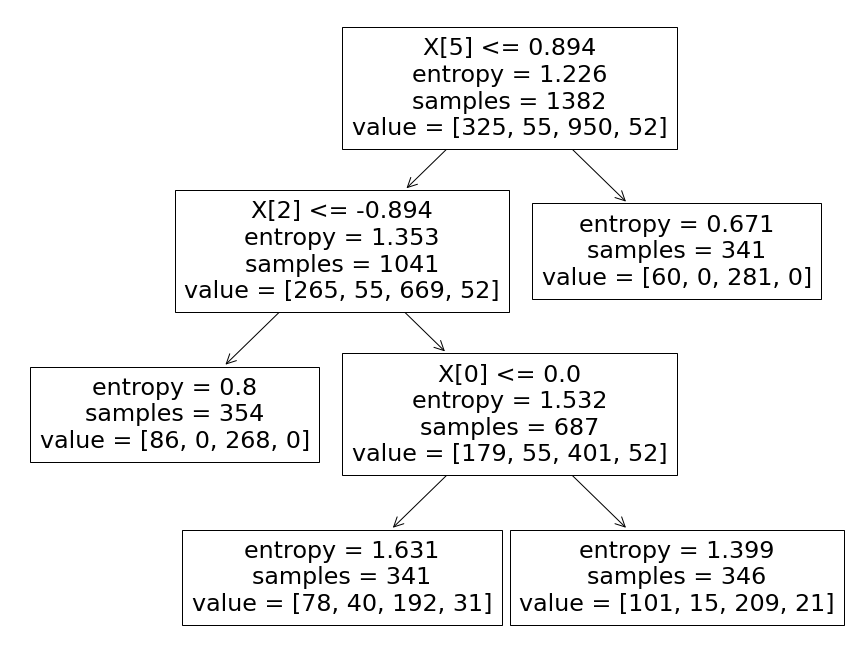

In [22]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
x=tree.plot_tree(dt_classifier)

In [23]:
y_pred = dt_classifier.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [24]:
y_test

,target
1233,2
592,0
625,2
1546,2
730,2
...,...
1433,2
1238,3
386,2
49,2


In [25]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.7514450867052023

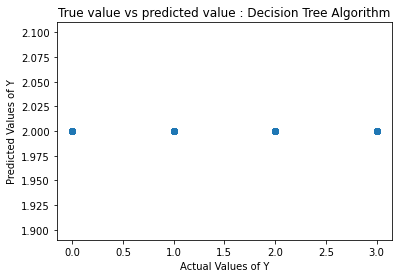

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values of Y')
plt.ylabel('Predicted Values of Y')
plt.title("True value vs predicted value : Decision Tree Algorithm")
plt.show()